In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pycountry_convert as pc
import warnings

In [18]:
#Performing data cleaning- same as in regression_continents file

warnings.filterwarnings('ignore')
df = pd.read_csv("./FPData2.csv")
df.columns = ['Country', 'year', 'ladder', 'gdp', 'support', 'life_expec', 'freedom', 'generosity','corruption','positive', 'negative']
y = df.groupby('Country').count()
less = y[y['year'] <= 10].index.tolist()
df_update = df[~df['Country'].isin(less)]
year_list = range(2011, 2020)
df_11 = df_update[df_update['year'].isin(year_list)]
y1 = df_11.groupby('Country').count()
less1 = y1[y1['year'] <= 8].index.tolist()
df_update1 = df_11[~df_11['Country'].isin(less1)]
df_update2 = df_update1.dropna()
df_update3 = df_update2

def continent(name):
    part1 = pc.country_name_to_country_alpha2(name)
    code = pc.country_alpha2_to_continent_code(part1)
    continent = pc.convert_continent_code_to_continent_name(code)
    return continent
df_update2['Country'] = df_update2['Country'].replace({'Congo (Brazzaville)':'Congo'})
df_update2['Country'] = df_update2['Country'].replace({'Turkiye':'Turkey'})
df_update2['Continent'] = df_update2.apply(lambda row: continent(row.Country), axis=1)
def cont_val(continent):
    continents = ['Asia', 'Africa', 'North America', 'South America', 'Oceania', 'Europe']
    return continents.index(continent)
df_update2['Continent'] = df_update2.apply(lambda row: cont_val(row.Continent), axis=1)

In [13]:
df_ind = df_update2.set_index('Country')
df_3 = df_ind.groupby('Country').mean()
df_ind = df_3.drop(['Continent'], axis=1)

In [14]:
'''PCA Analysis'''

# SCREE PLOT

# Scaling
scaler = StandardScaler()
scaler.fit(df_ind)

df_scaled = scaler.transform(df_ind)

# PCA
pca = PCA(n_components=4)
model = pca.fit(df_scaled)

Z = pca.transform(df_scaled)

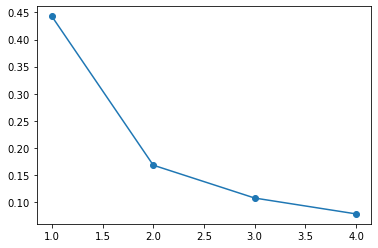

In [15]:
plt.plot(np.arange(1, 5), model.explained_variance_ratio_, marker='o')

In [16]:
df_country = df_ind.groupby(['Country']).mean()
countries = df_country.groupby('Country').mean().reset_index()

<Figure size 432x288 with 0 Axes>

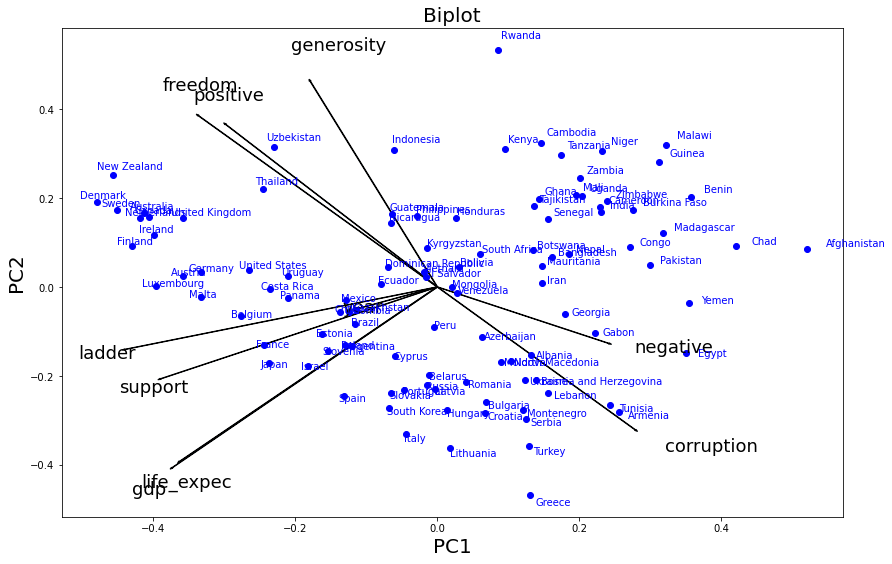

<Figure size 432x288 with 0 Axes>

In [19]:
#Creating a biplot to visualize the 106 countries,
#with respect to the feature variables and ladder outcome

pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df_scaled),
               columns = ['PC 1', 'PC 2'])
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], 
                        index=df_ind.columns)


PC1 = pca.fit_transform(df_scaled)[:,0]
PC2 = pca.fit_transform(df_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df_ind.columns

fig, ax = plt.subplots(figsize=(14, 9))
z1 = PC1 * scalePC1
z2 = PC2 * scalePC2
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
    

for i in range(106):
    plt.plot(z1[i], z2[i], 'bo')
    plt.text(z1[i]*1.05, z2[i]*1.05, list(countries.Country)[i], color='b')
    
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Biplot', fontsize=20)
plt.figure()